In [160]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib.dates import MonthLocator, DateFormatter, YearLocator
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.layers import Dense, InputLayer, LSTM
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
from keras.models import save_model


In [162]:
train = pd.read_csv('DailyClimateTrain.csv')           #Loading data
test = pd.read_csv('DailyClimateTest.csv')

In [164]:
print(f"train_shape: {train.shape}")
print(f"test_shape: {test.shape}")

train_shape: (1462, 5)
test_shape: (114, 5)


In [166]:
WINDOW_SIZE = 5

In [168]:
def data_to_input_and_output(data):                     #Preprocessing data

    input_data = []
    output_data = []
    for index in range(0, len(data) - WINDOW_SIZE):
        input_sample = data['meantemp'][index:index + WINDOW_SIZE]
        output_sample = data['meantemp'][index + WINDOW_SIZE]

        input_data.append(input_sample)
        output_data.append(output_sample)

    return np.array(input_data), np.array(output_data)

In [170]:
train_input, train_output = data_to_input_and_output(train)
test_input, test_output = data_to_input_and_output(test)

In [172]:
def train_neural_network(X, y, epochs=20, learning_rate=0.005):              #Building and Training NN #

    model = Sequential()
    model.add(InputLayer((WINDOW_SIZE, 1)))
    model.add(LSTM(64))
    model.add(Dense(8, 'relu'))
    model.add(Dense(1, 'linear'))

    check_point = ModelCheckpoint('model_checkpoint.keras', save_best_only=True, monitor='loss')

    model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=learning_rate), metrics=[RootMeanSquaredError()])

    model.fit(X, y, epochs=epochs, callbacks=[check_point])
    return model

In [174]:
model = train_neural_network(train_input, train_output)

Epoch 1/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 498.9076 - root_mean_squared_error: 22.1504
Epoch 2/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 43.8276 - root_mean_squared_error: 6.6088
Epoch 3/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6.9982 - root_mean_squared_error: 2.6047
Epoch 4/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.4635 - root_mean_squared_error: 1.8606
Epoch 5/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.3015 - root_mean_squared_error: 1.8132
Epoch 6/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.8138 - root_mean_squared_error: 1.6757
Epoch 7/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.7486 - root_mean_squared_error: 1.6577
Epoch 8/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.7449 - root_mean_squared_error: 1.6560
Epoch 9/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.7615 - root_mean_squared_error: 1.6616
Epoch 10/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.6666 - root_mean_squared_error: 1.6320
Epoch

In [177]:
model.save('model.keras')

In [179]:
train_pred = model.predict(train_input)
test_pred = model.predict(test_input)

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


In [181]:
def plot_predictions(pred, y_true, label, period):
    period = pd.to_datetime(period)

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(period, y_true, label='True Values', marker='o', color='b')
    plt.plot(period, pred, label='Predictions', marker='o', color='y')

    plt.xlabel('Date')
    plt.ylabel('Mean temperature')
    plt.title(label)
    plt.legend()

    if label == "Train Data":
        # Format X-axis to show only years
        plt.gca().xaxis.set_major_locator(YearLocator())
        plt.gca().xaxis.set_major_formatter(DateFormatter('%Y'))
    elif label == "Test Data":
        # Format X-axis to show only months
        plt.gca().xaxis.set_major_locator(MonthLocator())
        plt.gca().xaxis.set_major_formatter(DateFormatter('%b %Y'))

    # Rotate x-axis labels for better visibility
    plt.gcf().autofmt_xdate()
    
    plt.show()

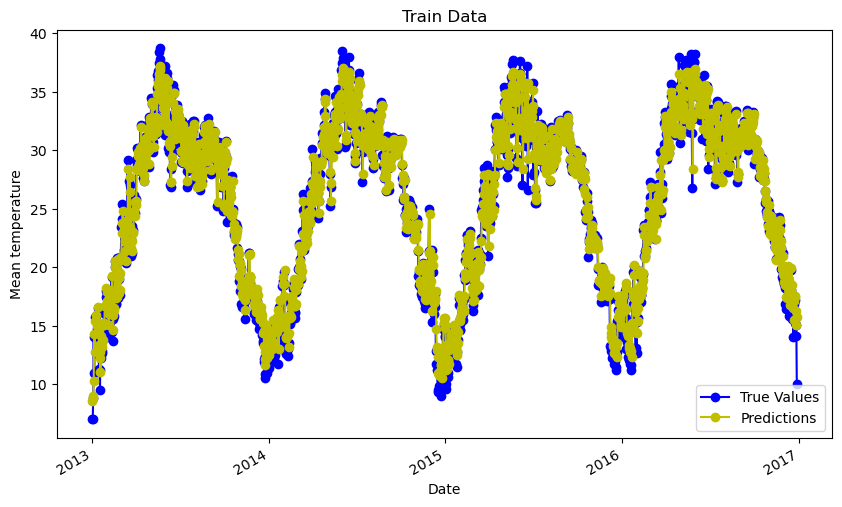

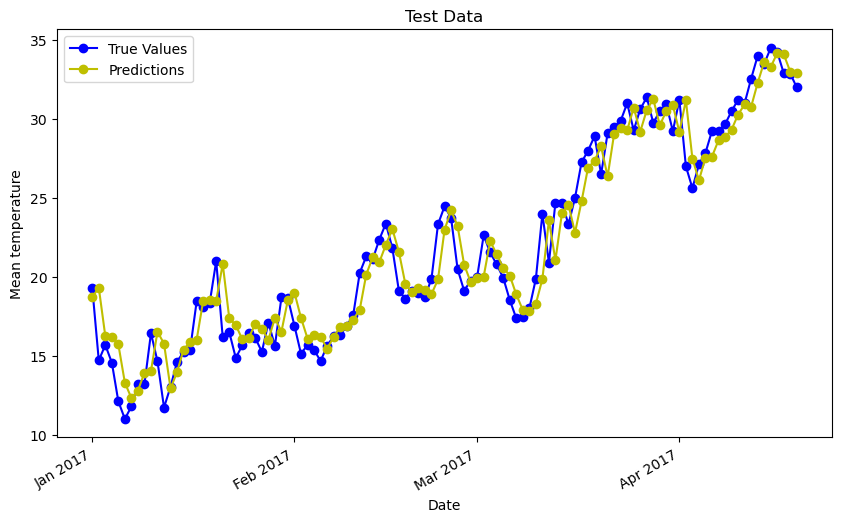

In [183]:
train_period = train[0:len(train) - WINDOW_SIZE]['date']
test_period = test[0:len(test) - WINDOW_SIZE]['date']

plot_predictions(train_pred, train_output, 'Train Data', train_period)
plot_predictions(test_pred, test_output, 'Test Data', test_period)

Epoch 1/20
21/21 - 0s - 13ms/step - loss: 2.7580 - root_mean_squared_error: 1.6607 - val_loss: 2.8215 - val_root_mean_squared_error: 1.6797
Epoch 2/20
21/21 - 0s - 8ms/step - loss: 2.7656 - root_mean_squared_error: 1.6630 - val_loss: 2.8195 - val_root_mean_squared_error: 1.6791
Epoch 3/20
21/21 - 0s - 8ms/step - loss: 2.7631 - root_mean_squared_error: 1.6623 - val_loss: 2.8194 - val_root_mean_squared_error: 1.6791
Epoch 4/20
21/21 - 0s - 9ms/step - loss: 2.7563 - root_mean_squared_error: 1.6602 - val_loss: 2.8190 - val_root_mean_squared_error: 1.6790
Epoch 5/20
21/21 - 0s - 9ms/step - loss: 2.7506 - root_mean_squared_error: 1.6585 - val_loss: 2.8198 - val_root_mean_squared_error: 1.6792
Epoch 6/20
21/21 - 0s - 7ms/step - loss: 2.7516 - root_mean_squared_error: 1.6588 - val_loss: 2.8189 - val_root_mean_squared_error: 1.6790
Epoch 7/20
21/21 - 0s - 9ms/step - loss: 2.7510 - root_mean_squared_error: 1.6586 - val_loss: 2.8201 - val_root_mean_squared_error: 1.6793
Epoch 8/20
21/21 - 0s - 8m

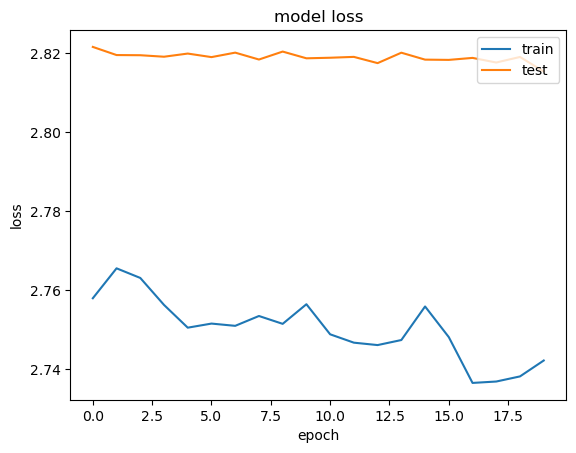

In [193]:
# fit network
history = model.fit(train_input, train_output, epochs=20, batch_size=70, validation_data=(test_input, test_output), verbose=2, shuffle=False)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right' )
plt.show()